In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df=pd.read_csv("labeled_data.csv")

In [3]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
df.shape

(24783, 7)

In [5]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [6]:
df.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [7]:
df.head(10)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,1,""" &amp; you might not get ya bitch back &amp; ..."
9,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [8]:
df['class'].unique()

array([2, 1, 0], dtype=int64)

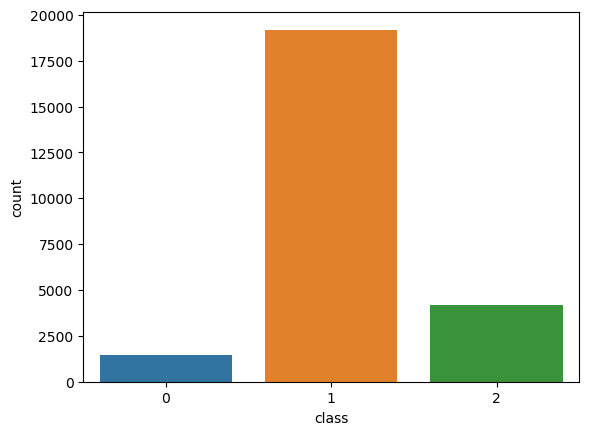

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot for displaying the plot

# Assuming 'class' is the column name in your DataFrame
sns.countplot(x='class', data=df)

# Show the plot
plt.show()


In [10]:
df[df['class']==0]['class']=1

C:\Users\sony\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df.head(5)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [12]:
df['class'].unique()

array([2, 1, 0], dtype=int64)

In [13]:
df[df['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [14]:
df["class"].replace({0: 1}, inplace=True)

In [15]:
df['class'].unique()

array([2, 1], dtype=int64)

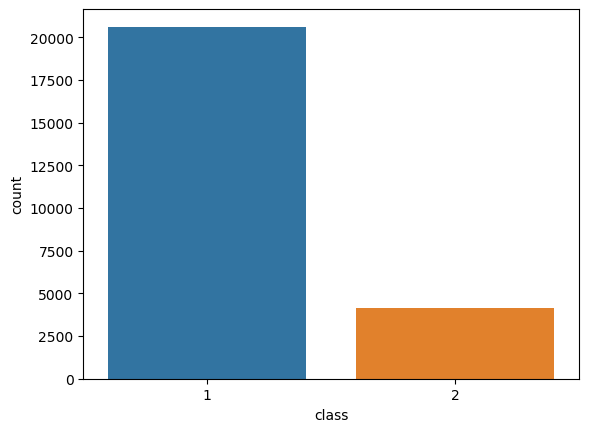

In [16]:
sns.countplot(x='class',data=df)

In [17]:
df[df['class']==0]

,class,tweet


In [18]:
df["class"].replace({2: 0}, inplace=True)

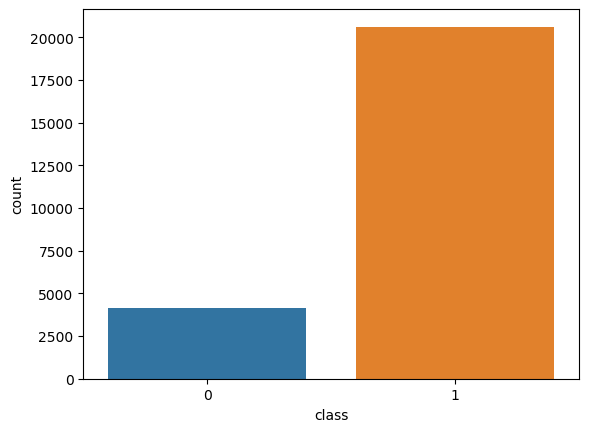

In [19]:
sns.countplot(x='class',data=df)

In [20]:
df.rename(columns ={'class':'label'}, inplace = True)

In [21]:
df.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [22]:
df.iloc[0]['tweet']

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [23]:
df.iloc[5]['tweet']

'!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"'

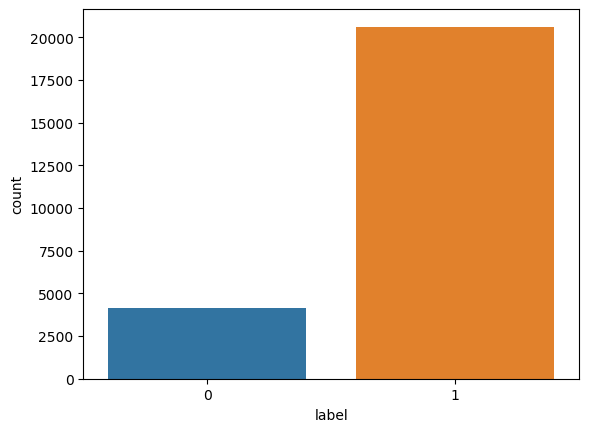

In [24]:
sns.countplot(x='label',data=df)

In [25]:
df.shape

(24783, 2)

In [26]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

C:\Users\sony\Anaconda3\envs\NLP\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\sony\Anaconda3\envs\NLP\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance:

In [27]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [28]:
df['tweet']=df['tweet'].apply(clean_text)

In [29]:
df.to_csv('test.csv',index=False)

In [30]:
df.head()

,label,tweet
0,0,rt mayasolov woman shouldnt complain clean ho...
1,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,1,rt urkindofbrand dawg rt ever fuck bitch sta...
3,1,rt cganderson vivabas look like tranni
4,1,rt shenikarobert shit hear might true might f...


In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  

In [32]:
def make_wordcloud(df):
    comment_words=""
    for val in df.tweet: 
        val = str(val).lower()

      
        comment_words += " ".join(val)+" "
    print(comment_words[0:100])
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,min_font_size = 10).generate(comment_words)
  
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [33]:
# make_wordcloud(df[df['label']==0])
df.to_csv('testing.csv',index=False)
df

,label,tweet
0,0,rt mayasolov woman shouldnt complain clean ho...
1,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,1,rt urkindofbrand dawg rt ever fuck bitch sta...
3,1,rt cganderson vivabas look like tranni
4,1,rt shenikarobert shit hear might true might f...
...,...,...
24778,1,yous muthafin lie coreyemanuel right tl tras...
24779,0,youv gone broke wrong heart babi drove redneck...
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie


In [34]:
x=df['tweet']
y=df['label']
type(x)

pandas.core.series.Series

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)


#print(len(x_train), len(y_train))
#print(len(x_test), len(y_test))
type(x_train)

pandas.core.series.Series

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english', ngram_range=(1,5))
x_train_vectorizer = count.fit_transform(x_train)
x_test_vectorizer = count.transform(x_test)


In [37]:
count.vocabulary_

{'rt': 258383,
 'lynchiewcvb': 194379,
 'big': 25827,
 'night': 221187,
 'wcvb': 347462,
 'martha': 199804,
 'coakleycharli': 62071,
 'baker': 20046,
 'debat': 76811,
 'bruinsminnesota': 49180,
 'wild': 352224,
 'world': 356403,
 'seri': 286931,
 'game': 115198,
 'rt lynchiewcvb': 269205,
 'lynchiewcvb big': 194380,
 'big night': 26145,
 'night wcvb': 221453,
 'wcvb martha': 347463,
 'martha coakleycharli': 199805,
 'coakleycharli baker': 62072,
 'baker debat': 20059,
 'debat bruinsminnesota': 76812,
 'bruinsminnesota wild': 49181,
 'wild world': 352270,
 'world seri': 356560,
 'seri game': 286935,
 'rt lynchiewcvb big': 269206,
 'lynchiewcvb big night': 194381,
 'big night wcvb': 26149,
 'night wcvb martha': 221454,
 'wcvb martha coakleycharli': 347464,
 'martha coakleycharli baker': 199806,
 'coakleycharli baker debat': 62073,
 'baker debat bruinsminnesota': 20060,
 'debat bruinsminnesota wild': 76813,
 'bruinsminnesota wild world': 49182,
 'wild world seri': 352271,
 'world seri gam

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 5), max_features=5000)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)


In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [40]:
model_vectorizer= MultinomialNB().fit(x_train_vectorizer, y_train)
prediction_vectorizer=model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,prediction_vectorizer))
print (classification_report(y_test, prediction_vectorizer))

[[ 338  703]
 [  21 5134]]
              precision    recall  f1-score   support

           0       0.94      0.32      0.48      1041
           1       0.88      1.00      0.93      5155

    accuracy                           0.88      6196
   macro avg       0.91      0.66      0.71      6196
weighted avg       0.89      0.88      0.86      6196



In [41]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_train)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
print (classification_report(y_test, prediction_tfidf))
print(confusion_matrix(y_test,prediction_tfidf))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57      1041
           1       0.89      0.99      0.94      5155

    accuracy                           0.90      6196
   macro avg       0.90      0.71      0.76      6196
weighted avg       0.90      0.90      0.88      6196

[[ 438  603]
 [  47 5108]]


In [42]:
#!pip install xgboost


In [43]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc' )

In [44]:
xgb_model_vectorizer = xgb_model.fit(x_train_vectorizer, y_train)
xgb_predictions_vectorizer=xgb_model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,xgb_predictions_vectorizer))
print (classification_report(y_test, xgb_predictions_vectorizer))

[[ 992   49]
 [ 355 4800]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1041
           1       0.99      0.93      0.96      5155

    accuracy                           0.93      6196
   macro avg       0.86      0.94      0.90      6196
weighted avg       0.95      0.93      0.94      6196



In [45]:
xgb_model = xgb_model.fit(x_train_tfidf, y_train)
xgb_predictions=xgb_model.predict(x_test_tfidf)
print(confusion_matrix(y_test,xgb_predictions))
print (classification_report(y_test, xgb_predictions))

[[ 972   69]
 [ 337 4818]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.83      1041
           1       0.99      0.93      0.96      5155

    accuracy                           0.93      6196
   macro avg       0.86      0.93      0.89      6196
weighted avg       0.94      0.93      0.94      6196



In [46]:
#!pip install tensorflow


In [47]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential

In [48]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences, maxlen=max_len)


In [49]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________


In [50]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=5
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [51]:
history=model.fit(sequences_matrix,y_train,batch_size=1024,epochs=10,
          validation_split=0.1,callbacks=[stop,checkpoint])

Epoch 1/10
17/17 [==============================] - 258s 14s/step - loss: 0.4804 - accuracy: 0.8062 - val_loss: 0.4145 - val_accuracy: 0.8306
Epoch 2/10
17/17 [==============================] - 261s 15s/step - loss: 0.3640 - accuracy: 0.8349 - val_loss: 0.3034 - val_accuracy: 0.8531
Epoch 3/10
17/17 [==============================] - 315s 19s/step - loss: 0.2201 - accuracy: 0.9034 - val_loss: 0.1970 - val_accuracy: 0.9123
Epoch 4/10
17/17 [==============================] - 301s 18s/step - loss: 0.1464 - accuracy: 0.9507 - val_loss: 0.1635 - val_accuracy: 0.9392
Epoch 5/10
17/17 [==============================] - 313s 18s/step - loss: 0.1041 - accuracy: 0.9679 - val_loss: 0.1428 - val_accuracy: 0.9441
Epoch 6/10
17/17 [==============================] - 331s 19s/step - loss: 0.0797 - accuracy: 0.9730 - val_loss: 0.1453 - val_accuracy: 0.9424
Epoch 7/10
17/17 [==============================] - 342s 20s/step - loss: 0.0617 - accuracy: 0.9789 - val_loss: 0.1469 - val_accuracy: 0.9484
Epoch 

In [52]:
history.history

{'loss': [0.48035305738449097,
  0.36398595571517944,
  0.22007566690444946,
  0.14636683464050293,
  0.1041226014494896,
  0.07967058569192886,
  0.06170583516359329,
  0.05001728981733322,
  0.0402519665658474,
  0.03307660296559334],
 'accuracy': [0.8061932325363159,
  0.834947407245636,
  0.9033955335617065,
  0.9507412910461426,
  0.9678981304168701,
  0.9730392098426819,
  0.9788976311683655,
  0.9834409356117249,
  0.9867886304855347,
  0.989179790019989],
 'val_loss': [0.41450080275535583,
  0.30339792370796204,
  0.19701872766017914,
  0.16345493495464325,
  0.1428496539592743,
  0.14528529345989227,
  0.14688506722450256,
  0.16301646828651428,
  0.17145779728889465,
  0.17214740812778473],
 'val_accuracy': [0.8305540680885315,
  0.8531468510627747,
  0.9123184680938721,
  0.9392146468162537,
  0.9440559148788452,
  0.9424421787261963,
  0.9483593106269836,
  0.9429801106452942,
  0.945131778717041,
  0.9478214383125305]}

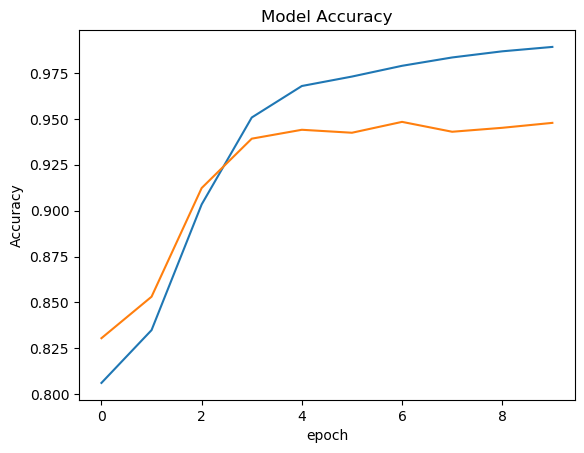

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
#plt.legend(['train'],loc='upper left')
plt.show()

In [54]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

# Training data
sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences, maxlen=max_len)

# Test data
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)


In [55]:
accr = model.evaluate(test_sequences_matrix,y_test)

194/194 [==============================] - 26s 132ms/step - loss: 0.1942 - accuracy: 0.9338


In [56]:
lstm_prediction=model.predict(test_sequences_matrix)

194/194 [==============================] - 27s 132ms/step


In [57]:
res=[]
for prediction in lstm_prediction:
    if prediction[0]<0.5:
        res.append(0)
    else:
        res.append(1)

In [58]:
print(confusion_matrix(y_test,res))

[[ 827  214]
 [ 196 4959]]


In [59]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [60]:
model.save("hate&abusive_model.h5")

In [61]:
import keras

In [62]:
load_model=keras.models.load_model("./hate&abusive_model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [66]:
from keras.preprocessing import sequence

test = 'I wanna kill you and rape you and cut you in pieces'
def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
test=[clean_text(test)]
print(test)

from tensorflow.keras.preprocessing import sequence  # Use tensorflow.keras instead of keras

# ... (your existing code)

seq = load_tokenizer.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=300)  # Use sequence from tf.keras.preprocessing
print(seq)
pred = load_model.predict(padded)
print("pred", pred)
if pred < 0.5:
    print("no hate")
else:
    print("hate and abusive")


I wanna kill you and rape you and cut you in pieces
i wanna kill you and rape you and cut you in pieces
['wanna kill rape cut piec']
[[64, 131, 675, 231, 741]]
1/1 [==============================] - 1s 506ms/step
pred [[0.97530764]]
hate and abusive


In [69]:
from keras.preprocessing import sequence

test = 'You are a bloody bitch'
def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
test=[clean_text(test)]
print(test)

from tensorflow.keras.preprocessing import sequence  # Use tensorflow.keras instead of keras


seq = load_tokenizer.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=300)  # Use sequence from tf.keras.preprocessing
print(seq)
pred = load_model.predict(padded)
print("pred", pred)
if pred < 0.5:
    print("no hate")
else:
    print("hate and abusive")


You are a bloody bitch
you are a bloody bitch
['bloodi bitch']
[[3669, 1]]
1/1 [==============================] - 0s 73ms/step
pred [[0.99557316]]
hate and abusive


In [70]:
from keras.preprocessing import sequence

test = 'I love this country'
def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
test=[clean_text(test)]
print(test)

from tensorflow.keras.preprocessing import sequence  # Use tensorflow.keras instead of keras


seq = load_tokenizer.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=300)  # Use sequence from tf.keras.preprocessing
print(seq)
pred = load_model.predict(padded)
print("pred", pred)
if pred < 0.5:
    print("no hate")
else:
    print("hate and abusive")


I love this country
i love this country
['love countri']
[[22, 681]]
1/1 [==============================] - 0s 75ms/step
pred [[0.48118925]]
no hate


In [71]:
from keras.preprocessing import sequence

test = 'I hate this country'
def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
test=[clean_text(test)]
print(test)

from tensorflow.keras.preprocessing import sequence  # Use tensorflow.keras instead of keras


seq = load_tokenizer.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=300)  # Use sequence from tf.keras.preprocessing
print(seq)
pred = load_model.predict(padded)
print("pred", pred)
if pred < 0.5:
    print("no hate")
else:
    print("hate and abusive")


I hate this country
i hate this country
['hate countri']
[[41, 681]]
1/1 [==============================] - 0s 96ms/step
pred [[0.7308418]]
hate and abusive
